Import the neccessary libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

Configuration and Data Loading

In [32]:
MODELS = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0,random_state=42),
    "Lasso Regression": Lasso(alpha=0.1,random_state=42),
    "ElasticNet Regression": ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=5,random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100,random_state=42)
}

In [33]:
try:
    df = pd.read_csv("GS.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: GS.csv not found. Please entire the file is the same directory")
    exit()

df

Data loaded successfully!


,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-05-04,76.000000,77.250000,70.000000,70.375000,53.576797,22320900
1,1999-05-05,69.875000,69.875000,66.250000,69.125000,52.625153,7565700
2,1999-05-06,68.000000,69.375000,67.062500,67.937500,51.721100,2905700
3,1999-05-07,67.937500,74.875000,66.750000,74.125000,56.431648,4862300
4,1999-05-10,73.375000,73.500000,70.250000,70.687500,53.814709,2589400
...,...,...,...,...,...,...,...
5757,2022-03-18,338.869995,346.769989,337.299988,345.380005,345.380005,5861100
5758,2022-03-21,345.260010,346.299988,337.149994,339.000000,339.000000,3401200
5759,2022-03-22,342.200012,346.239990,340.119995,343.010010,343.010010,2840200
5760,2022-03-23,340.000000,340.829987,335.130005,335.609985,335.609985,2196800


Data Preprocessing

In [34]:
# Convert the "date" column to datetime objects
df["Date"] = pd.to_datetime(df["Date"])

In [35]:
# Check for missing values
df_missing = df.isnull().sum()
print("Missing Values")
print(df_missing)

Missing Values
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [36]:
# Check for duplicated rows
df_duplicated = df.duplicated().sum()
print("Duplicated Rows")
print(df_duplicated)

Duplicated Rows
0


Feature Engineering

In [37]:
features = ["Open","High","Low","Volume"]
target = "Adj Close"

# Define the feature matrix (X) and the target variable (y)
X = df[features]
y = df[target]

Data Scaling



In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled,columns=features)

Data Splitting

In [39]:
# Split the data into training and testing sets (80% train, 20% test)
# random_state ensures reproducibility of the split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

Training set size: 4609 samples
Testing set size: 1153 samples


Visualization Before Training

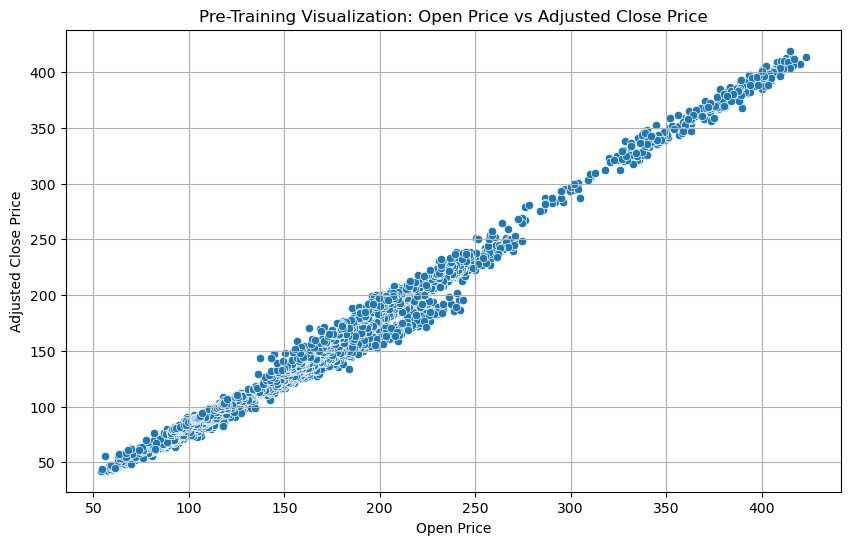

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Open"],y=df[target],data=df)
plt.title("Pre-Training Visualization: Open Price vs Adjusted Close Price")
plt.xlabel("Open Price")
plt.ylabel("Adjusted Close Price")
plt.grid(True)
plt.show()

Model Training and Comparison

In [41]:
results = {}

print("----- Model Training and Evaluation-----")
for name , model in MODELS.items():
    print(f"Training {name}........")
    # Train the model using the scaled training data
    model.fit(X_train,y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the performance 
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    # Store the results
    results[name] = {
        "RMSE":rmse,
        "R2": r2,
        "Model": model
    }

    # Print the results
    print(f"   {name}: R2 = {r2:.4f}, RMSE= ${rmse:.2f}")


# Find the best model based on R2 score (highest R2 typically best for regression)
best_model_name = max(results,key=lambda k :results[k]["R2"])
best_model_data = results[best_model_name]
best_model = best_model_data["Model"]


print(f"----- Best Model Selection -----")
print(f"The best model is '{best_model_name}' with R2 = {best_model_data["R2"]:.4f}")

----- Model Training and Evaluation-----
Training Linear Regression........
   Linear Regression: R2 = 0.9896, RMSE= $7.40
Training Ridge Regression........
   Ridge Regression: R2 = 0.9895, RMSE= $7.43
Training Lasso Regression........
   Lasso Regression: R2 = 0.9893, RMSE= $7.52
Training ElasticNet Regression........
   ElasticNet Regression: R2 = 0.9888, RMSE= $7.70
Training Decision Tree Regressor........
   Decision Tree Regressor: R2 = 0.9907, RMSE= $7.01
Training Random Forest Regressor........


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.860e+03, tolerance: 2.477e+03
  model = cd_fast.enet_coordinate_descent(


   Random Forest Regressor: R2 = 0.9953, RMSE= $4.97
----- Best Model Selection -----
The best model is 'Random Forest Regressor' with R2 = 0.9953


Visualization After Training

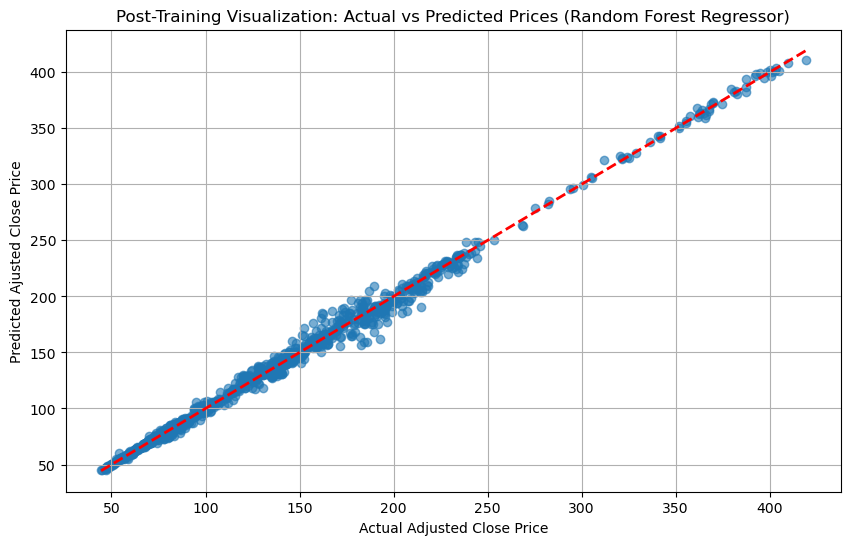

In [42]:
# Get predictions from the best model
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10,6))
# scatter plot of Actual values vs Predicted values
# A perfect model would have all points lying exactly on the diagonal line (y=x)
plt.scatter(y_test,y_pred_best,alpha=0.6)
# Plot the ideal prediction line (y=x) for comparison
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--",lw=2)
plt.title(f"Post-Training Visualization: Actual vs Predicted Prices ({best_model_name})")
plt.xlabel("Actual Adjusted Close Price")
plt.ylabel("Predicted Ajusted Close Price")
plt.grid(True)
plt.show()

Interactive Prediction and Input Function

In [43]:
def make_single_prediction(model,scaler,feature_names):
    print(f"Interactive Prediction using {best_model_name}")
    print("Enter the following values to predict the Adjusted Close Price")

    # Initialize a list to hold the user's input values
    user_input_values = []

    # Loop through the required features and ask the user for input
    for feature in feature_names:
        while True:
            try:
                # Prompt the user for the value of the current feature
                value = float(input(f"Enter {feature}:"))
                user_input_values.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a numerical value")
    # Convert the list of inputs into a numpy array (row vector)
    new_data = np.array([user_input_values])

    # The model was trained on scaled data, so the new data must also be scaled
    new_data_scaled = scaler.transform(new_data)

    # Make predictiond using the best trained model
    predicted_price = model.predict(new_data_scaled)[0]

    # Print the final result
    print("-"*50)
    print(f"Input: Open={user_input_values[0]}, High={user_input_values[1]}, Low={user_input_values[2]}, Volume={user_input_values[3]}")
    print(f"The predicted Adjusted Close Price is: ${predicted_price:.2f}")
    print("-"*50)


# Run the interactive prediction function
make_single_prediction(best_model,scaler,features)

Interactive Prediction using Random Forest Regressor
Enter the following values to predict the Adjusted Close Price
--------------------------------------------------
Input: Open=66666.7, High=77.0, Low=3.0, Volume=3.0
The predicted Adjusted Close Price is: $75.87
--------------------------------------------------


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
